In [1]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()
import logging
logger = logging.getLogger('detectron2')

# import some common libraries
import numpy as np
import cv2
from PIL import Image
from IPython.display import display

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

In [7]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5

logger.info(f"Loaded Config:\n{cfg.dump()}")

[06/15 18:03:22 detectron2]: Loaded Config:
CUDNN_BENCHMARK: false
DATALOADER:
  ASPECT_RATIO_GROUPING: true
  FILTER_EMPTY_ANNOTATIONS: true
  NUM_WORKERS: 4
  REPEAT_THRESHOLD: 0.0
  SAMPLER_TRAIN: TrainingSampler
DATASETS:
  PRECOMPUTED_PROPOSAL_TOPK_TEST: 1000
  PRECOMPUTED_PROPOSAL_TOPK_TRAIN: 2000
  PROPOSAL_FILES_TEST: []
  PROPOSAL_FILES_TRAIN: []
  TEST:
  - coco_2017_val
  TRAIN:
  - coco_2017_train
GLOBAL:
  HACK: 1.0
INPUT:
  CROP:
    ENABLED: false
    SIZE:
    - 0.9
    - 0.9
    TYPE: relative_range
  FORMAT: BGR
  MASK_FORMAT: polygon
  MAX_SIZE_TEST: 1333
  MAX_SIZE_TRAIN: 1333
  MIN_SIZE_TEST: 800
  MIN_SIZE_TRAIN:
  - 640
  - 672
  - 704
  - 736
  - 768
  - 800
  MIN_SIZE_TRAIN_SAMPLING: choice
MODEL:
  ANCHOR_GENERATOR:
    ANGLES:
    - - -90
      - 0
      - 90
    ASPECT_RATIOS:
    - - 0.5
      - 1.0
      - 2.0
    NAME: DefaultAnchorGenerator
    OFFSET: 0.0
    SIZES:
    - - 32
    - - 64
    - - 128
    - - 256
    - - 512
  BACKBONE:
    FREEZE_AT: 2
 

In [3]:
predictor = DefaultPredictor(cfg)

In [4]:
im = cv2.imread('input.jpg')

In [5]:
outputs = predictor(im)

In [ ]:
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

In [30]:
def get_human_bboxes(output,confidence=0.9,meta_cats=MetadataCatalog.get("coco_2017_val").thing_classes):
    raw = output['instances']
    boxes = raw.pred_boxes.tensor.tolist()
    cats = [meta_cats[x] for x in raw.pred_classes.tolist()]
    scores = raw.scores.tolist()
    return [boxes[i] for i in range(len(raw)) if cats[i] == 'person' and scores[i] >= confidence]

def crop_bbox(img,bbox):
    x1,y1,x2,y2 = [round(x) for x in bbox]
    return img[y1:y2,x1:x2],[x1,y1,x2,y2]

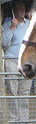

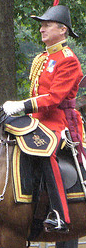

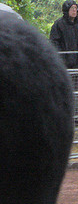

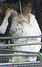

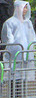

In [31]:
#https://www.kaggle.com/c/imaterialist-fashion-2019-FGVC6/data?select=label_descriptions.json
for bbox in get_human_bboxes(outputs):
    cropped,c_bbox = crop_bbox(im,bbox)
    #https://github.com/yu45020/Waifu2x INSERT UPSAMPLER
    display(Image.fromarray(cropped[:,:,::-1]))

In [ ]:
#use this to convert bboxes next time
#https://detectron2.readthedocs.io/modules/structures.html?highlight=boxmode#detectron2.structures.BoxMode.convert

#index bbox directly to key box object rather than convert it to list next time

## Approaches
1. Crop humans: Segmentation versus pure Bbox? Human keypoint dataset vs COCO human filtered
2. Upscaling: https://github.com/yu45020/Waifu2x ?????
3. Clothes bbox: Segmentation versus pure bbox (again) The true dataset has been found: https://github.com/eBay/modanet
4. map bbox back to original (how to increase cropping precision? upscale original image before cropping?)



### Good reason to use R101-FPN for everything:
1. It trains fast
2. It uses decent vram
3. It has near SOTA performance anyways
4. AND IT PREDICTS FAST ANYWAYS
5. why is this model so OP